# Biological Signals Analysis - Week 2 Homework

## Created by Guy Singer, January 11, 2024

## Table of Contents
- [Math Exercises - Dirac's Delta and Discrete Fourier Transforms](#math-exercises)
    - [Question 1: Approximating Dirac's Delta Function with a Gaussian](#question-1)
    - [Question 2: Extracting Values from a Continuous Function Using Dirac's Delta](#question-2)
    - [Question 3: Mathematical Expression of Discrete Fourier Transform (DFT)](#question-3)
    - [Question 4: Conceptual Understanding of Time Domain to Frequency Domain](#question-4)
- [Programming Exercises - Analyzing EEG Data](#programming-exercises)
    - [Loading and Visualizing the EEG Data](#loading-data)
    - [Question 5: Record Your Observations](#question-5)
    - [Question 6: Sampling in Time](#question-6)
    - [Question 7: Fourier Transform of the EEG Data](#question-7)
    - [Question 8: record observations about the frequency plot](#question-8)
    - [Decibel Scaling](#decibel-scale)
    - [Question 9: interpreting decibel scale results](#question-9)
    - [The Spectrogram](#spectrogram)

<a id="math-exercises"></a>
## Math Exercises - Dirac's Delta and Discreet Fourier Transforms

The first portion of this homework assignment contains mathematics questions related to the topics covered this week (sampling in time and transformations into the frequency domain).
Please write your answers using the Jupyter markup cell’s LaTeX interpreter, or embed a scanned image/pdf of your answers into the markup cell.

More information about LaTeX and Jupyter markdown formatting can be found here:

[https://jupyterbook.org/en/stable/content/math.html](https://jupyterbook.org/en/stable/content/math.html)

And Here:

[https://ashki23.github.io/markdown-latex.html](https://ashki23.github.io/markdown-latex.html)

<a id="question-1"></a>
### Question 1: Approximating Dirac's Delta Function with a Gaussian
It's often useful to approximate the Dirac Delta function, $(\delta(x))$, with a Gaussian function for practical implementations. Consider a Gaussian function of the form 

$G(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{x^2}{2\sigma^2}}$

Where $\sigma$ is the standard deviation. 

**Task:** 
- Derive an expression for $G(x)$ as $\sigma$ approaches zero, and discuss how this relates to the Dirac Delta function.
- Explain the implications of this approximation in the context processing continuous signals.

Write your answer in the following markdown cell:

To derive an expression for \(G(x)\) as $\sigma$ approaches zero, we start with the standard form of the normal distribution:

$G(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{x^2}{2\sigma^2}}$

Taking the limit as $\sigma$ approaches zero:

$ \lim_{{\sigma \to 0}} G(x) = \lim_{{\sigma \to 0}} \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{x^2}{2\sigma^2}}$

In this limit, the exponential term dominates, and the expression simplifies to:

$ G(x) = \lim_{{\sigma \to 0}} \frac{1}{\sigma\sqrt{2\pi}} $

The expression, as $\sigma$ approaches zero, becomes a spike representing an infinitely narrow and tall peak, which is a characteristic of the Dirac Delta function

$G(x) = \lim_{{\sigma \to 0}} \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{x^2}{2\sigma^2}} = \delta(x) $

where $\delta(x)$ is the Dirac Delta function.


In the context of processing continuous signals, we want to present them in the frequency domain, $\delta(x)$ allows to convert a continuous signal into a discrete one. Which is essential process in  Fourier transforms- for the straightforward transformation of time-domain signals into frequency-domain representations. Moreover, $\delta(x)$ simplifies analysis significantly- the approximation of the normal distribution as the Dirac Delta function suggests that the signal becomes increasingly localized and concentrated at a specific point. The Dirac Delta function is often used to model instantaneous events or impulses in signal processing. It can also help to find out whether a signal has a very short duration or undergoes an instantaneous change. 



<a id="question-2"></a>
### Question 2: Extracting Values from a Continuous Function Using Dirac's Delta
The Dirac Delta function can be used to extract specific values from a continuous function, which is a concept useful in signal processing in neuroscience.

Given a continuous function $f(t)$ representing a continuous signal over time, and considering the sifting property of the Dirac Delta function,

**Task:** 
- Write the integral expression that extracts the value of $f(t)$ at time $t_0$ using the Dirac Delta function.

Write your answer in the following markdown cell:


$ \int_{-\infty}^{\infty} f(t) \cdot \delta(t - t_0) \, dt = f(t_0) $


<a id="question-3"></a>
### Question 3: Mathematical Expression of Discrete Fourier Transform (DFT)

The Discrete Fourier Transform (DFT) is used to analyze the frequency content of discrete signals.

**Task:**
Given a discrete time series $x[n]$ where $n = [0, 1, ..., N-1]$ and $N$ is the total number of samples, write down the mathematical expression for the DFT, $X[k]$, of this time series.

Write your answer in the following markdown cell:

$X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j\frac{2\pi}{N}kn} $


<a id="question-4"></a>
### Question 4: Conceptual Understanding of Time Domain to Frequency Domain
The transformation from the time domain to the frequency domain is a foundational concept in signal processing and is useful in analyzing a wide range of neurophysiological signals.

**Task:**
Explain, in your own words, the significance of transforming a signal from the time domain to the frequency domain. Discuss how this transformation can be beneficial in the context of analyzing neurophysiological signals.

Write your answer in the following markdown cell:

# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.io import loadmat
import os
from scipy.signal import spectrogram
from scipy.io import loadmat

rcParams['figure.figsize']=(12,3)

------------------------------------------------------------------------------------------------------

<a id='programming-exercises'> </a>
## Programming Exercises - Analyzing EEG Data

The following code cells contain the programming portion of this homework assignment. In this assignment, we will load an EEG signal, examine it, and record our obersvations. Then, we will transform the signal into the frequency domain using a Fourier Transform. Finally, we will write down our observations about the signal expressed in the frequency domain.

<a id='loading-data'> </a>
### Loading and Visualizing EEG Data

In [ ]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.io import loadmat
import os
from scipy.signal import spectrogram
from scipy.io import loadmat

rcParams['figure.figsize']=(12,3)

In [ ]:
## First, we inspect the data in the time domain
from scipy.io import loadmat

data = loadmat('EEG-Signal-Homework.mat')  # Load the EEG data
EEG = data['EEG'][:, 0]                 # Extract the EEG variable
t = data['t'][0]                        # Extract the time variable

plot(t, EEG)                            # Plot the data in the time domain
xlabel('Time [s]')                      # Label the time axis
ylabel('Voltage [$\mu V$]')             # Label the voltage axis
autoscale(tight=True)                   # Minimize white space
show()

In our plot, the voltage trace is plotted as a continuous line, but don't be fooled into thinking that the signal has been stored as a continuous signal. If we zoom in on the data, we can see our signal actually consists of discreet data points (shown below). Although the physiological signal being recorded evolves as a continuous signal, we observe discrete samples of this continuous signal. The sampling rate is determined by the EEG recording device used. In this example, the **data is being sampled at 1000Hz, or one sample every 1ms.**

In [ ]:
plot(t[:25], EEG[:25], 'o-')    # Plot the first 25 points
xlabel('Time [s]')              # Label the time axis
ylabel('Voltage [$\mu V$]')     # Label the voltage axis
show()

<a id="question-5"></a>
### Question 5: record your observations

In the following markdown cell, in a few sentences, record your observations of this signal in its time domain. What can and cannot be inferred from the signal when it is represented in this format?

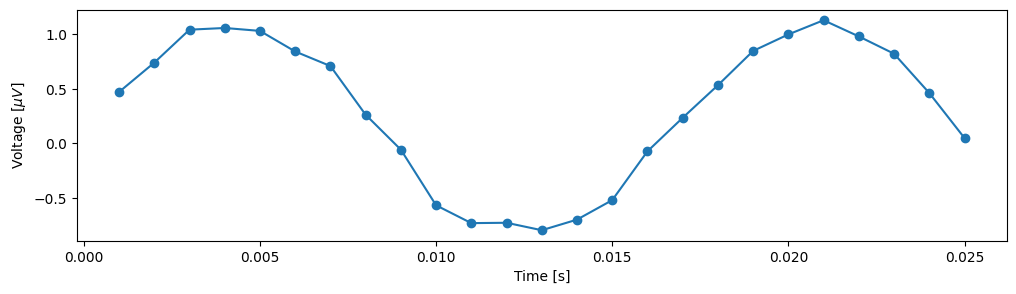

I can inferred there is one signal and it has low frequency.

<a id="question-6"></a>
### Question 6: calculating total time and sampling frequency

We denote the sampling variables as follows:

&emsp; **Total time sampled:** &emsp;  $ T = N \Delta$

Where:

&emsp; $\Delta$ &emsp; = &emsp; time between samples

&emsp; $N$ &emsp; = &emsp; number of samples

We denote the **sampling frequency** as:

&emsp; $f_s = 1/\Delta$

Please fill out the following python code sell to define the variables for $\Delta$ (dt), $N$, $T$, and $f_s$ (f_s).

In [ ]:
dt = t[1] - t[0] 
N = len(EEG)
T = N * dt
f_s = 1/dt

<a id="question-7"></a>
### Question 7: Fourier Transform of the EEG Data

While there are many techniques to analyze rhythmic activity in EEG data, in this example we will compute the *power spectral density*, or simply the *spectrum*, of the signal using the <a href="https://en.wikipedia.org/wiki/Fourier_transform" rel="external">*Fourier transform*</a>.
    
**Note**: The *spectrum* of the data is the magnitude squared of the Fourier-transformed data. The spectrum indicates the amplitude of rhythmic activity as a function of frequency. The *power spectral density* describes the extent to which sinusoids of a single frequency capture the structure of the data. To compute the power over any range of frequencies, we would integrate (or for discrete frequencies, sum) the spectrum over that frequency range.

In the following code cell, use the Fourier transform functions in Numpy to transform the EEG signal into the frequency domain.

In [ ]:
import numpy as np

EEG_transformed = np.fft.rfft(EEG)
''' Hint: look up the fourier transform functions in Numpy, and use the Discrete Fourier Transform for real input function'''

spectrum = (2 * dt ** 2 / T * EEG_transformed  * EEG_transformed.conj()).real
faxis = arange(len(spectrum)) / T.max()
plot(faxis, spectrum)
xlim([0, 100]) # Setting the frequency range.
xlabel('Frequency (Hz)')
ylabel('Power [$\mu V^2$/Hz]')
show()

<a id="question-8"></a>
### Question 8: record observations about the frequency plot

In the following markdown cell, record your observations about the frequency domain plot, and what conclusions can or cannot be drawn from this plot. Do you suspect there to be any data that is not immediately observable in the plot?

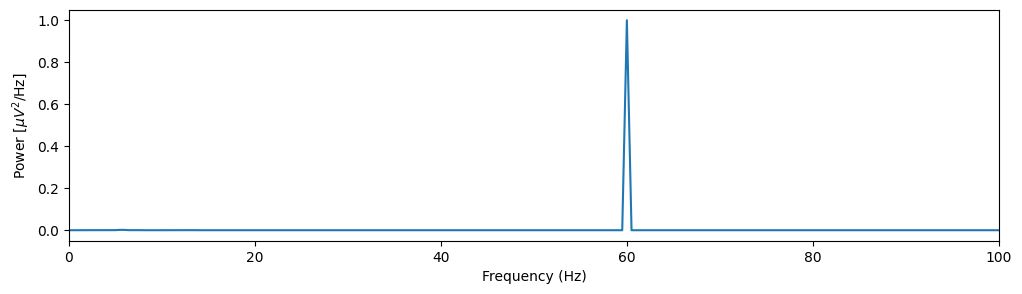

From this plot, I can inferred that one rhythem appears in the EEG signal

<a id="decibel-scale"></a>
### Decibel Scaling

From the frequency plot, we can observe that the spectrum is dominated by a single peak at 60 Hz. There may be additional weaker rhythmic activity in the data, but these features remain hidden in the plot because of the large 60 Hz peak. We could state that the 60 Hz peak saturates the vertical scale. One technique to emphasize lower-amplitude rhythms hidden by large-amplitude oscillations is to change the scale of the spectrum to **decibels**. The decibel scale is a logarithmic scale. To convert our scale to decibels, we divide the spectrum by the maximum value observed in it, and then take the base 10 logarithm of this ratio. Finally, we multiply the result by 10.

In [ ]:
plot(faxis, 10 * log10(spectrum / max(spectrum)))  # Plot the spectrum in decibels.
xlim([0, 100])                           # Setting the frequency range.
ylim([-60, 0])                           # Setting the decibel range.
xlabel('Frequency [Hz]')                
ylabel('Power [dB]')
show()

<a id="question-9"></a>
### Question 9: interpreting decibel scale results

In the following code cell, answer the question "what is the value in decibels at 60Hz?"
Enter your answer by setting the variable "decibel-value_at_60" to your answer.

In [ ]:
decibel_value_at_60 = 0

The decibel scale reveals new structure in the spectrum. In particular, two peaks have emerged at frequencies 5–15 Hz. These peaks are much weaker than the 60 Hz signal; both peaks are approximately 30 dB below the maximum at 60 Hz, or equivalently, three *orders of magnitude* weaker. Because these peaks are so small relative to the 60 Hz signal, neither was apparent in the original plot of the spectrum.

<a id="spectrogram"></a>
### The Spectrogram

The spectrum plotted using the decibel scale suggests that three rhythms appear in the EEG signal: 60 Hz, approximately 11 Hz, and approximately 6 Hz. Given only these results, we may reasonably conclude that these three rhythms appear simultaneously throughout the entirety of the EEG recording. That is an assumption we make in computing the spectrum of the entire interval. To further test this assumption in the EEG data, we compute the *spectrogram*. The idea of the spectrogram is to break up the time series into smaller intervals of data and then compute the spectrum in each interval. These intervals can be quite small and can even overlap. The result is the spectrum as a function of frequency and time.

To compute and display the spectrogram in Python, we use the function `spectrogram` from the `scipy` module, and provide four arguments to the function:

  - Data: 'EEG'
  - Sampling frequency: 'fs'
  - Interval size/segment length: 'nperseg'
  - Overlap between intervals (here set to 95%): 'noverlap'

More information about these options can be found in the documentation:

[https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html)

In [ ]:
from scipy.signal import spectrogram

f, t, Sxx = spectrogram(
    EEG,                  
    fs=f_s,                
    nperseg=int(f_s),     
    noverlap=int(f_s * 0.95))     
pcolormesh(t, f, 10 * log10(Sxx), cmap='jet')
colorbar()                
ylim([0, 70])             
xlabel('Time [s]')        
ylabel('Frequency [Hz]')
show()